# Методы Оптимизации. Даниил Меркулов. Методы одномерной минимизации.

## Напоминание: классификация методов по скорости сходимости.

### Определения

* Сублинейная
$$
\| x_{k+1} - x^* \|_2 \leq C k^{\alpha},
$$
где $\alpha < 0$ и $ 0 < C < \infty$

* Линейная
$$
\| x_{k+1} - x^* \|_2 \leq Cq^k \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|_2
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

* Сверхлинейная 
$$
\| x_{k+1} - x^* \|_2 \leq Cq^{k^2} \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C_k\| x_k - x^* \|_2
$$
где $q \in (0, 1)$ и $ 0 < C_k < \infty$, $C_k \to 0$

* Квадратичная
$$
\| x_{k+1} - x^* \|_2 \leq C q^{2^k} \qquad\qquad\qquad \text{или} \qquad\qquad\qquad \| x_{k+1} - x^* \|_2 \leq C\| x_k - x^* \|^2_2
$$
где $q \in (0, 1)$ и $ 0 < C < \infty$

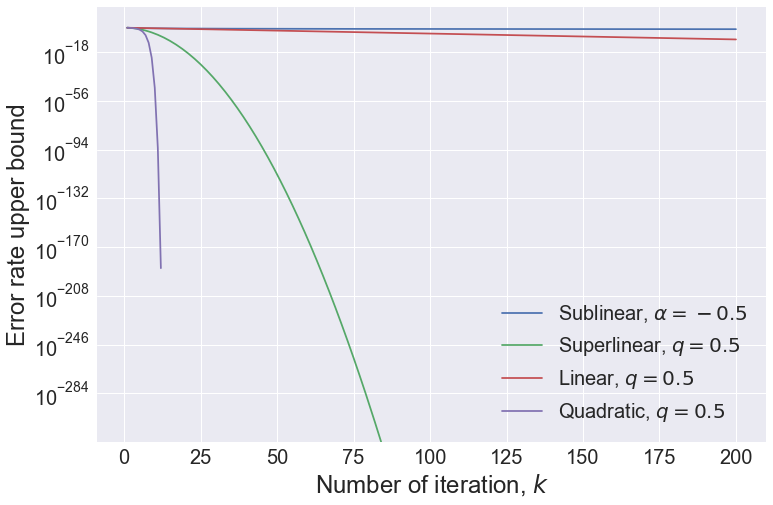

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

C = 10
alpha = -0.5
q = 0.9
num_iter = 200
sublinear = np.array([C * k**alpha for k in range(1, num_iter + 1)])
linear = np.array([C * q**k for k in range(1, num_iter + 1)])
superlinear = np.array([C * q**(k**2) for k in range(1, num_iter + 1)])
quadratic = np.array([C * q**(2**k) for k in range(1, num_iter + 1)])
plt.figure(figsize=(12,8))
plt.semilogy(np.arange(1, num_iter+1), sublinear, 
             label=r"Sublinear, $\alpha = -0.5$")
plt.semilogy(np.arange(1, num_iter+1), superlinear, 
             label=r"Superlinear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), linear, 
             label=r"Linear, $q = 0.5$")
plt.semilogy(np.arange(1, num_iter+1), quadratic, 
             label=r"Quadratic, $q = 0.5$")
plt.xlabel("Number of iteration, $k$", fontsize=24)
plt.ylabel("Error rate upper bound", fontsize=24)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Методы одномерной минимизации
### Что и зачем?
$$
f^* = \min_{x \in S} f(x),
$$
причем $x \in \mathbb{R}, \;\;S = [a, b]$. Часто предполагается, что функция $f(x)$ непрерывна на компакте $S$. 

Данная задача является одной из наиболее простых формальных задач оптимизации, тем не менее, она является важным звеном в решении более сложных задач, поэтому очень важно эффективно ее решать. Ограничим класс рассматриваемых задач при которых $f(x)$ является *унимодальной функцией*.

Функция $f(x)$ называется **унимодальной** на $[a, b]$, если существует $x_* \in [a, b]$, что $f(x_1) > f(x_2) \;\;\; \forall a \le x_1 < x_2 < x_*$ и $f(x_1) < f(x_2) \;\;\; \forall x_* \le x_1 < x_2 < b$ 
![](unimodal.png)

Пусть $f(x)$ унимодальная функция на $[a, b]$. Тогда если $x_1 < x_2 \in [a, b]$, то:
* если $f(x_1) \leq f(x_2) \to x_* \in [a, x_2]$
* если $f(x_1) \geq f(x_2) \to x_* \in [x_1, b]$
![](unimodal_pro.gif)

### Метод Дихотомии
#### Идея
Делим отрезок на две равные части и выбираем по значению функций тот из них, который содержит решение задачи. 
#### Алгоритм
```python
def binary_search(f, a, b, epsilon):
    c = (a + b) / 2
    while abs(b - a) > epsilon:
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
    return c
```
![](binary_search.gif)
#### Оценки
Величина отрезка на $k+1$ ой итерации:
$$
\Delta_{k+1} = b_{k+1} - a_{k+1} = \dfrac{1}{2^k}(b-a)
$$
Для унимодальных функций при выборе середины отрезка справедливо: 
$$
|x_{k+1} - x_*| \leq \Delta_{k+1} \leq \dfrac{1}{2^k}(b-a) \leq (0.5)^k \cdot (b-a)
$$
Обозначая правую часть последнего неравенства за $\varepsilon$, получаем число итераций метода, необходимых для достижения $\varepsilon$ точности:
$$
K = \left\lceil \log_2 \dfrac{b-a}{\varepsilon} + 1 \right\rceil
$$
#### Демо

TO BE DONE

### Метод Золотого Сечения
#### Идея
Аналогично Дихотомии, но делить отрезок $[a,b]$ не на две равные насти, а в пропорции "золотого сечения", т.е. найти такую точку $c \in [a, b]: \frac{c-a}{b-c} = \frac{b-a}{c-a}$
#### Алгоритм
```python
def golden_search(f, a, b, epsilon):
    tau = (sqrt(5) + 1) / 2
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > epsilon:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
    return (a + b) / 2
```
#### Оценки
$$
|x_{k+1} - x_*| \leq b_{k+1} - a_{k+1} = \left( \frac{1}{\tau} \right)^{N-1} (b - a) \approx 0.618^k(b-a),
$$
где $\tau = \frac{\sqrt{5} + 1}{2}$.

* Константа геометрической прогрессии **больше**, чем у метода дихотомии
* Количество вызовов функции **меньше**, чем у метода дихотомии
#### Демо

TO BE DONE

### Сравнение методов

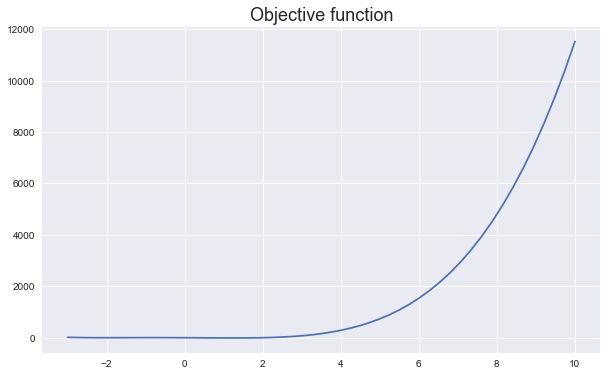

In [46]:
%matplotlib inline
def binary_search(f, a, b, epsilon, callback=None):
    c = (a + b) / 2.0
    while abs(b - a) > epsilon:
#         Check left subsegment
        y = (a + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
#         Check right subsegment
            z = (b + c) / 2.0
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        if callback is not None:
            callback(a, b)
    return c

def my_callback(a, b, left_bound, right_bound, approximation):
    left_bound.append(a)
    right_bound.append(b)
    approximation.append((a + b) / 2.0)
    
    
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

# Target unimodal function on given segment
f = lambda x: (x - 2) * x * (x + 2)**2 # np.power(x+2, 2)
# f = lambda x: -np.sin(x)
x_true = -2
# x_true = np.pi / 2.0
a = -3
b = 10
epsilon = 1e-8
x_opt = binary_search(f, a, b, epsilon, callback_bs)

plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=18)

-9.914949590828147
-9.91494959083
3.28077640501


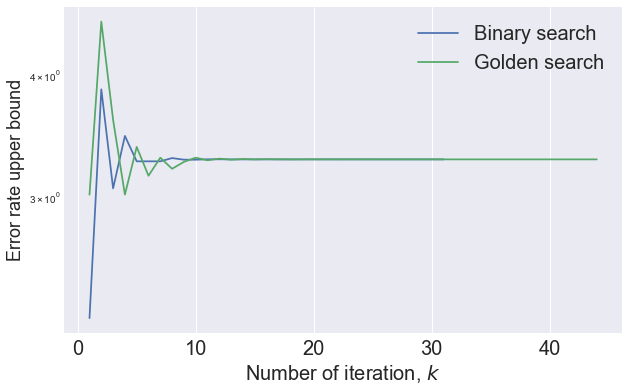

In [47]:
def golden_search(f, a, b, tol=1e-5, callback=None):
    tau = (np.sqrt(5) + 1) / 2.0
    y = a + (b - a) / tau**2
    z = a + (b - a) / tau
    while b - a > tol:
        if f(y) <= f(z):
            b = z
            z = y
            y = a + (b - a) / tau**2
        else:
            a = y
            y = z
            z = a + (b - a) / tau
        if callback is not None:
            callback(a, b)
    return (a + b) / 2.0

left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(f(x_opt))
print(f(x_gs))
print(np.abs(x_opt - x_true))

plt.figure(figsize=(10,6))
plt.semilogy(np.arange(1, len(approximation_bs) + 1), np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary search")
plt.semilogy(np.arange(1, len(approximation_gs) + 1), np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden search")
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel("Error rate upper bound", fontsize=18)
plt.legend(loc="best", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

In [39]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

10000 loops, best of 3: 53 µs per loop
10000 loops, best of 3: 122 µs per loop


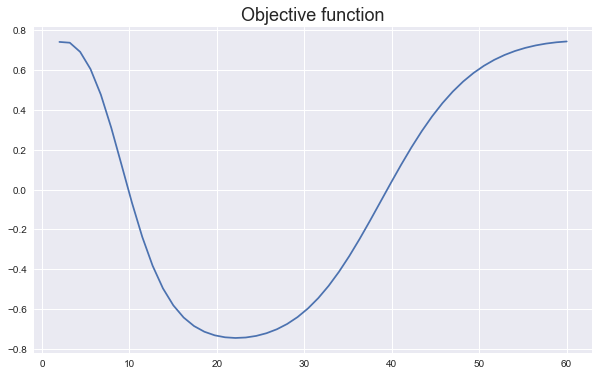

In [43]:
f = lambda x: np.sin(np.sin(np.sin(np.sqrt(x))))
x_true = (3 * np.pi / 2)**2
a = 2
b = 60
epsilon = 1e-8
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function", fontsize=18)

9.81513963438e-08
9.81513963438e-08


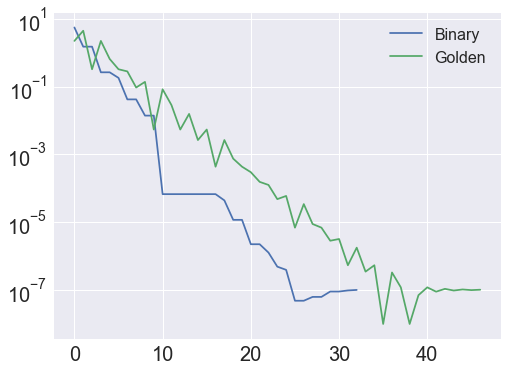

In [41]:
left_boud_bs = []
right_bound_bs = []
approximation_bs = []

callback_bs = lambda a, b: my_callback(a, b, 
            left_boud_bs, right_bound_bs, approximation_bs)

x_opt = binary_search(f, a, b, epsilon, callback_bs)
print(np.abs(x_opt - x_true))

left_boud_gs = []
right_bound_gs = []
approximation_gs = []

cb_gs = lambda a, b: my_callback(a, b, left_boud_gs, right_bound_gs, approximation_gs)
x_gs = golden_search(f, a, b, epsilon, cb_gs)

print(np.abs(x_opt - x_true))

plt.figure(figsize=(8,6))
plt.semilogy(np.abs(x_true - np.array(approximation_bs, dtype=np.float64)), label="Binary")
plt.semilogy(np.abs(x_true - np.array(approximation_gs, dtype=np.float64)), label="Golden")
plt.legend(fontsize=16)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

In [42]:
%timeit binary_search(f, a, b, epsilon)
%timeit golden_search(f, a, b, epsilon)

1000 loops, best of 3: 452 µs per loop
1000 loops, best of 3: 415 µs per loop


In [4]:
# Stylish cell, better to compile at the beginning
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'fontsize': 4,
              'theme': 'simple_cyr',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'height': '724',
              'scroll': True,
              'slideNumber': True
})


from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: locate_profile has moved to the IPython.paths module since IPython 4.0.
  after removing the cwd from sys.path.
